---
# S&P 500 Stock Analysis: Is Technology the Right Investment for the Future?

---
# Introduction

The S&P 500 stock market index, maintained by S&P Dow Jones Indices, comprises 505 common stocks issued by 500 large-cap companies and traded on American exchanges, and covers about 80 percent of the American equity marekt by capitalization, i.e. S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices, and many consider it to be one of the best representations of the U.S. stock market. The S&P 500 component stocks cover eleven (11) market sectors and a total of 128 sub industries. 

The objective of this project is to perform the U.S equity market/stocks analysis through the new technology: data science concepts, knowledge, and tools. The data analysis and calculation are based on Python software with modules: NumPy & Pandas, and matplotlib & seaborn libraries.

This project consists of 6 parts.

**feel free to modify**

* Part 1 - S&P 500 stocks historical data collection and cleaning
* Part 2 - Descriptive statistic analysis for S&P 500 stocks
* Part 3 - Data analysis under stock/industry level
* Part 4 - Coronavirus effect on S&P 500 stock prices
* Part 5 - Stock price forecasting and prediction
* Part 6 - Conclusion

Each part is provided in a separate file. It is recommended to follow the order of the files.

---
# Part 1: S&P 500 Stocks Historical Data Collection and Cleaning

#### Task 1:

Import raw data;

Identify missing values, anomalies and outliers (Data cleaning);

Merge datasets and resolve mismatches;

---

In [13]:
# Import and merge datasets

import pandas as pd

sp500 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/stock%20data.csv")
stockReference = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies.csv")

fullDataset = pd.merge(sp500, stockReference, how="left", left_on='Name', right_on='ticker')
fullDataset = fullDataset[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]
fullDataset.head()

,date,close,Name,ticker,company name,sector
0,08-02-2013,14.75,AAL,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,AAL,American Airlines Group Inc.,Industrials


In [14]:
# Identify Mismatches
# Noticed that 21 stocks could not match to available reference information

unmatchedData = fullDataset[fullDataset["ticker"].isnull()]
print(unmatchedData.Name.unique())
print(unmatchedData.date.unique())

['AET' 'ANDV' 'CA' 'CBG' 'COL' 'CSRA' 'DPS' 'ESRX' 'EVHC' 'GGP' 'HCN'
 'KORS' 'LUK' 'MON' 'PCLN' 'PX' 'SCG' 'SNI' 'TWX' 'WYN' 'XL']
['08-02-2013' '11-02-2013' '12-02-2013' ... '05-02-2018' '06-02-2018'
 '07-02-2018']


In [15]:
# Resolve mismatch issue
# Manually looked up "Names" and appended to stock reference file

stockReference_v2 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies_updated.csv")

fullDataset_v2 = pd.merge(sp500, stockReference_v2, how="left", left_on='Name', right_on='ticker')
fullDataset_v2 = fullDataset_v2[['date', 'close', 'Name', 'ticker', 'company name', 'sector']]

unmatchedData_v2 = fullDataset_v2[fullDataset_v2["ticker"].isnull()]
print(unmatchedData_v2.Name.unique())
print(unmatchedData_v2.date.unique())

[]
[]


In [16]:
# Identify Inconsistencies
# Noticed that the list of stocks were captured based on date of data pull and does not populate historical information for
# stocks that fell out of SP500 between the start date to last date

countByDate = fullDataset_v2.groupby('date').count()
countByDate.sort_values(by=['sector'], ascending=True)

,close,Name,ticker,company name,sector
date,,,,,
26-04-2013,472,472,472,472,472
22-04-2013,476,476,476,476,476
02-05-2013,476,476,476,476,476
15-04-2013,476,476,476,476,476
04-03-2013,476,476,476,476,476
...,...,...,...,...,...
11-01-2018,505,505,505,505,505
29-01-2018,505,505,505,505,505
05-12-2017,505,505,505,505,505


In [11]:
# Resolve inconsistency issue


In [139]:
# Compile final dataset for analysis

cleanDataset = fullDataset_v2[['date', 'close', 'ticker', 'company name', 'sector']]
cleanDataset.head()

,date,close,ticker,company name,sector
0,08-02-2013,14.75,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,American Airlines Group Inc.,Industrials


#### Conclusion:

We found issues with data we have gathered. We filled in the gaps where we can and left data as is for things we cannot change 
with current resources


---
# Part 2 - Descriptive Statistic Analysis for S&P 500 Stocks

#### Task 2:

Perform descriptive analysis;

first question: how has the composition of stocks by industry changed over time?

Calculate and graph stock composition by industry over time;

### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

In [18]:
# grouping data by industry
fullDataset_grouped = fullDataset.groupby('industry')

---
# Part 3 - Data Analysis under Stock/Industry Level

#### Task 3: 

Second question: What are the daily and monthly price changes at individual stock and industry level? (Sector Level) 

Calculate daily and monthly price changes by industry and determine distribution of standard deviation

#### Task 4: 

Third question:If we are to select a stock by industry at random, what are the chances that it has positive return?

Calculate percentage of stocks with positive return by industry over time.

Which industry should we invest in for the most return? 

If we pick the top 5 expensive stock in this industry, what is the monthly return over the period for these 5 stocks? 

Is there any Seasonality for the monthend close price? 

Is there autocorrelation of the monthend close prices of each of the 5 stocks? 

Visualize the correlation between the returns of all pairs of stocks.

#### Task 5:

Fourth question: Is there a linear correlation between volatility of prices to overall return?

Calculate correlation of stock returns to price volatility by industry over time.

#### Task 6:

Fifth question:Is there a correlation between days of loss until a day of positive return?

Calculate days of loss until positive return and chi square of dataset to determine if they are dependent

#### Task 8: 

Seventh question: Is there seasonality in the data? (sector level does Sector perform welll during certain period)

Find seasonality effect using lag plot or autocorrelation functions.


### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

In [140]:
# Task 8:

# Check Total Ticker/Company Unique Number:
len(cleanDataset.ticker.unique())


505

In [141]:
# List Ticker/Company Name
TickerList = cleanDataset.ticker.unique()
TickerList


array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [142]:
# Check Sector Unique Number:
len(cleanDataset.sector.unique())


11

In [193]:
# List Sector Name
SectorName = cleanDataset.sector.unique()
SectorName


array(['Industrials', 'Technology', 'Consumer Cyclical', 'Healthcare',
       'Consumer Defensive', 'Financial Services', 'Utilities',
       'Real Estate', 'Basic Materials', 'Communication Services',
       'Energy'], dtype=object)

In [206]:
# Create DataFrame for Ticker vs Sector
TickerSector = pd.pivot_table(cleanDataset, index=['ticker','sector'])
#TickerSector
TickerSector.head()


,,close
ticker,sector,
A,Healthcare,49.202025
AAL,Industrials,38.393252
AAP,Consumer Cyclical,132.433463
AAPL,Technology,109.066698
ABBV,Healthcare,60.864440


In [172]:
# Reshape Historical Close for Ticker with Pivot Function
HistData = cleanDataset.pivot(index='date', columns='ticker', values='close')
HistData.head()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
01-02-2016,37.69,39.38,154.89,96.4300,54.39,89.00,38.45,106.28,89.61,53.17,...,36.35,49.90,76.29,60.03,37.72,35.62,73.10,99.03,22.50,42.96
01-02-2017,49.26,44.05,160.59,128.7500,60.89,88.61,42.33,113.21,113.36,76.17,...,37.93,57.39,82.94,56.90,28.28,49.15,64.87,118.51,42.46,55.32
01-02-2018,72.83,53.88,117.29,167.7800,116.34,99.29,62.18,160.46,199.38,91.65,...,36.79,72.49,89.07,60.73,32.75,74.84,83.98,128.19,54.98,77.82
01-03-2013,41.93,13.61,76.37,61.4957,37.81,47.98,33.60,74.82,39.83,45.23,...,28.82,36.65,89.43,41.16,32.60,27.49,65.21,74.99,24.04,34.60
01-03-2016,38.59,41.83,153.35,100.5300,56.34,87.43,39.33,103.45,88.37,54.70,...,35.56,48.21,81.28,60.43,39.72,37.94,76.19,97.39,22.31,42.10


In [171]:
# Display Historical Data DataFrame Information
HistData.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-01-03 to 2018-12-01
Columns: 505 entries, A to ZTS
dtypes: float64(505)
memory usage: 4.9 MB


In [173]:
# Review Historical Stock Price Index/Date 
HistData.index


Index(['01-02-2016', '01-02-2017', '01-02-2018', '01-03-2013', '01-03-2016',
       '01-03-2017', '01-04-2013', '01-04-2014', '01-04-2015', '01-04-2016',
       ...
       '31-08-2015', '31-08-2016', '31-08-2017', '31-10-2013', '31-10-2014',
       '31-10-2016', '31-10-2017', '31-12-2013', '31-12-2014', '31-12-2015'],
      dtype='object', name='date', length=1259)

In [174]:
# Sort HistData DataFrame Date
HistData.index = pd.to_datetime(HistData.index)
HistData.sort_index(inplace=True)
HistData.head()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-01-03,41.93,13.61,76.37,61.4957,37.81,47.98,33.60,74.82,39.830,45.23,...,28.82,36.65,89.43,41.16,32.60,27.49,65.21,74.99,24.04,34.60
2013-01-04,40.93,16.67,82.34,61.2728,41.12,51.64,35.31,75.85,43.380,45.41,...,30.25,37.65,90.77,42.11,34.40,27.25,71.17,75.13,24.78,32.59
2013-01-05,41.31,16.60,84.34,62.7557,45.55,53.84,36.89,79.77,44.710,43.88,...,30.89,37.61,87.51,41.82,33.32,27.50,67.60,75.30,24.18,33.39
2013-01-07,43.59,16.80,81.89,58.4599,41.61,55.01,35.03,72.10,46.235,45.37,...,30.62,39.91,90.30,41.16,36.96,27.65,70.22,75.00,29.35,30.61
2013-01-08,46.04,19.38,83.43,65.2394,45.25,58.80,36.84,74.85,47.700,49.94,...,32.06,47.15,92.73,42.90,39.64,25.19,73.90,84.47,30.15,30.16


In [177]:
# Review Historical Stock Price Index/Date 
HistData.index


DatetimeIndex(['2013-01-03', '2013-01-04', '2013-01-05', '2013-01-07',
               '2013-01-08', '2013-01-10', '2013-01-11', '2013-02-04',
               '2013-02-05', '2013-02-07',
               ...
               '2018-04-01', '2018-05-01', '2018-05-02', '2018-06-02',
               '2018-07-02', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', length=1259, freq=None)

In [228]:
# Calculate Daily Return
DailyReturn = HistData.pct_change()
#DailyReturn = DailyReturn.dropna()
DailyReturn.head()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,-0.023849,0.224835,0.078172,-0.003625,0.087543,0.076282,0.050893,0.013766,0.089129,0.003980,...,0.049618,0.027285,0.014984,0.023081,0.055215,-0.008730,0.091397,0.001867,0.030782,-0.058092
2013-01-05,0.009284,-0.004199,0.024290,0.024202,0.107733,0.042603,0.044747,0.051681,0.030659,-0.033693,...,0.021157,-0.001062,-0.035915,-0.006887,-0.031395,0.009174,-0.050162,0.002263,-0.024213,0.024547
2013-01-07,0.055192,0.012048,-0.029049,-0.068453,-0.086498,0.021731,-0.050420,-0.096151,0.034109,0.033956,...,-0.008741,0.061154,0.031882,-0.015782,0.109244,0.005455,0.038757,-0.003984,0.213813,-0.083258
2013-01-08,0.056206,0.153571,0.018806,0.115968,0.087479,0.068897,0.051670,0.038141,0.031686,0.100727,...,0.047028,0.181408,0.026910,0.042274,0.072511,-0.088969,0.052407,0.126267,0.027257,-0.014701


In [181]:
# Check Potential NaN at Each Column
DailyReturn.isnull().sum().unique()


array([   1,   13, 1069,  987,  231,    4,  485,  988,  985,  759,  735,
        227,  983,  229,  483,  228,  479,  230,  734,  731,  482],
      dtype=int64)

In [175]:
# Generate Month End Historical Stock Price
HistData_MonthEnd = HistData.resample('BM').last()
HistData_MonthEnd.head()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,51.10,22.44,99.91,74.2899,48.96,66.38,36.96,73.00,54.610,49.68,...,30.32,45.28,89.82,47.15,40.08,33.22,68.48,87.89,28.42,31.84
2013-02-28,41.48,13.43,76.34,63.0571,36.92,47.20,33.79,74.36,39.310,45.22,...,28.64,37.27,89.55,41.42,32.44,27.50,65.48,74.96,24.15,33.45
2013-03-29,41.97,16.97,82.65,63.2371,40.78,51.45,35.32,75.97,43.515,46.49,...,30.30,38.17,90.11,42.44,34.40,27.56,71.94,75.22,24.99,33.40
2013-04-30,41.44,16.90,83.88,63.2542,46.05,54.12,36.92,81.44,45.080,43.99,...,31.14,37.91,88.99,42.35,34.32,27.75,68.12,76.45,24.62,33.02
2013-05-31,45.45,17.57,81.52,64.2478,42.69,54.08,36.67,82.11,42.910,45.93,...,31.43,40.65,90.47,41.76,35.16,28.14,67.75,78.51,28.07,32.00


In [176]:
# Calculate Monthly Return
MonthlyReturn = HistData_MonthEnd.pct_change()
#MonthlyReturn = MonthlyReturn.dropna()
MonthlyReturn.head()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,-0.188258,-0.401515,-0.235912,-0.151202,-0.245915,-0.288942,-0.085768,0.018630,-0.280168,-0.089775,...,-0.055409,-0.176899,-0.003006,-0.121527,-0.190619,-0.172185,-0.043808,-0.147116,-0.150246,0.050565
2013-03-29,0.011813,0.263589,0.082657,0.002855,0.104550,0.090042,0.045280,0.021651,0.106970,0.028085,...,0.057961,0.024148,0.006253,0.024626,0.060419,0.002182,0.098656,0.003469,0.034783,-0.001495
2013-04-30,-0.012628,-0.004125,0.014882,0.000270,0.129230,0.051895,0.045300,0.072002,0.035965,-0.053775,...,0.027723,-0.006812,-0.012429,-0.002121,-0.002326,0.006894,-0.053100,0.016352,-0.014806,-0.011377
2013-05-31,0.096766,0.039645,-0.028135,0.015708,-0.072964,-0.000739,-0.006771,0.008227,-0.048137,0.044101,...,0.009313,0.072276,0.016631,-0.013932,0.024476,0.014054,-0.005432,0.026946,0.140130,-0.030890


In [182]:
# Check Potential NaN at Each Column
MonthlyReturn.isnull().sum().unique()


array([ 1,  2, 53, 49, 13, 25, 38, 37], dtype=int64)

In [ ]:
# 1. Single Stock Seasonality Analysis:


In [ ]:
# 2. Stock Sector Seasonality Analysis:


In [217]:
# Create Sector Dictionary
SectorDict = {}
for name in SectorName:
    tickers =[]
    for pos in range(len(TickerSector.index)):
        if TickerSector.index[pos][1] == name:
            tickers.append(TickerSector.index[pos][0])
    SectorDict[name] = tickers
    
SectorDict

{'Industrials': ['AAL',
  'ADP',
  'ALK',
  'ALLE',
  'AME',
  'AOS',
  'ARNC',
  'AVY',
  'BA',
  'CAT',
  'CHRW',
  'CMI',
  'COL',
  'CSX',
  'CTAS',
  'DAL',
  'DE',
  'DOV',
  'EFX',
  'EMR',
  'ETN',
  'EXPD',
  'FAST',
  'FDX',
  'FIS',
  'FISV',
  'FLR',
  'FLS',
  'GD',
  'GE',
  'GPN',
  'GWW',
  'HII',
  'HON',
  'INFO',
  'IR',
  'IRM',
  'ITW',
  'JBHT',
  'JCI',
  'JEC',
  'KSU',
  'LLL',
  'LMT',
  'LUV',
  'MMM',
  'NLSN',
  'NOC',
  'NSC',
  'PAYX',
  'PCAR',
  'PH',
  'PNR',
  'PWR',
  'RHI',
  'ROK',
  'ROP',
  'RSG',
  'RTN',
  'SNA',
  'SRCL',
  'SWK',
  'TDG',
  'TXT',
  'UAL',
  'UNP',
  'UPS',
  'URI',
  'UTX',
  'VRSK',
  'WM',
  'XYL'],
 'Technology': ['AAPL',
  'ACN',
  'ADBE',
  'ADI',
  'ADSK',
  'AKAM',
  'AMAT',
  'AMD',
  'ANSS',
  'APH',
  'ATVI',
  'AVGO',
  'AYI',
  'CA',
  'CDNS',
  'CERN',
  'CRM',
  'CSCO',
  'CSRA',
  'CTSH',
  'CTXS',
  'DXC',
  'EA',
  'FB',
  'FFIV',
  'FLIR',
  'FTV',
  'GLW',
  'GOOG',
  'GOOGL',
  'GRMN',
  'HPE',
  'HPQ',
 

In [262]:
# Create Daily S&P 500 Return
DailySP500Return = pd.DataFrame(index=DailyReturn.index)
DailySP500Return = pd.DataFrame(DailyReturn).mean(axis=1, skipna=True)

DailySP500Return = DailySP500Return.dropna()
DailySP500Return


date
2013-01-04    0.033101
2013-01-05    0.015351
2013-01-07    0.026664
2013-01-08    0.066736
2013-01-10    0.007483
                ...   
2018-08-01    0.037617
2018-09-01   -0.000358
2018-10-01   -0.002595
2018-11-01    0.009095
2018-12-01    0.006160
Length: 1258, dtype: float64

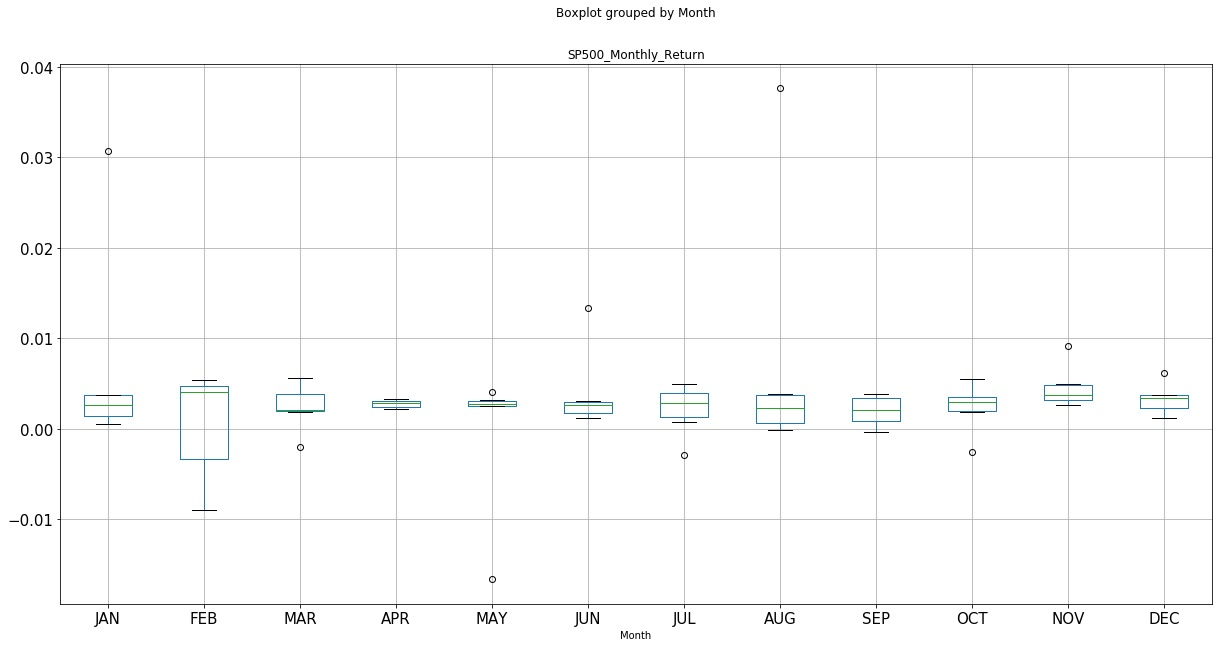

In [270]:
# Boxplot Grouped by Month for SP500
Monthly_Returns_SP500 = DailySP500Return.groupby([DailySP500Return.index.year.rename('year'), 
                                               DailySP500Return.index.month.rename('month')]).mean()
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 20,10

Monthly_Returns_List = []
for i in range(len(Monthly_Returns_SP500)):
    Monthly_Returns_List.append({'Year':Monthly_Returns_SP500.index[i][0],'Month':Monthly_Returns_SP500.index[i][1],
                                 'SP500_Monthly_Return': Monthly_Returns_SP500[i]})
Monthly_Returns_List=pd.DataFrame(Monthly_Returns_List,
                                  columns=('Year','Month','SP500_Monthly_Return'))

Monthly_Returns_List.boxplot(column='SP500_Monthly_Return', by='Month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

ax.set_xticklabels(labels)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

#### Observations/Comments:

* Overall market return trend exhibits a wave like pattern: market returns seem to increase from January to April followed by decrease in average returns in May and June. August to December exhibits steady increase in market returns.
* Highest range of return (high to low range of box plot) in the past 16+ years occured in January, July, and August.
* October demonstrates low donwside trade probability as low part of the box plot is closely situated outside the first quantile of the data. Therefore, it might provide good opportunity for investor to get in market or add to their investments. However, proper backtesting is needed to prove this hypothesis.
* Months of June and December provide the smallest quarterfinal range (IQR). Coincidentally, the aforementioned months are half year and end of the trading year

In [281]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(HistData['AMZN'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.331485
p-value: 0.998974
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


#### Observations/Comments:
* Now we will utilize the Augmented Dickey-Fuller Test for stationarity. The null hypothesis states that large p values indicate non-stationarity and smaller p values indicate stationarity. (We will be using 0.05 as selected alpha value.)
* As suspected, ADF test revealed the time series data (SPY stock data) are non stationary meaning time series is a stochastic process whose unconditional joint probability distribution changes when shifted in time. Now we know our time series is non staitionary, we attempt to exploit seasonality trends using time series decomposition.

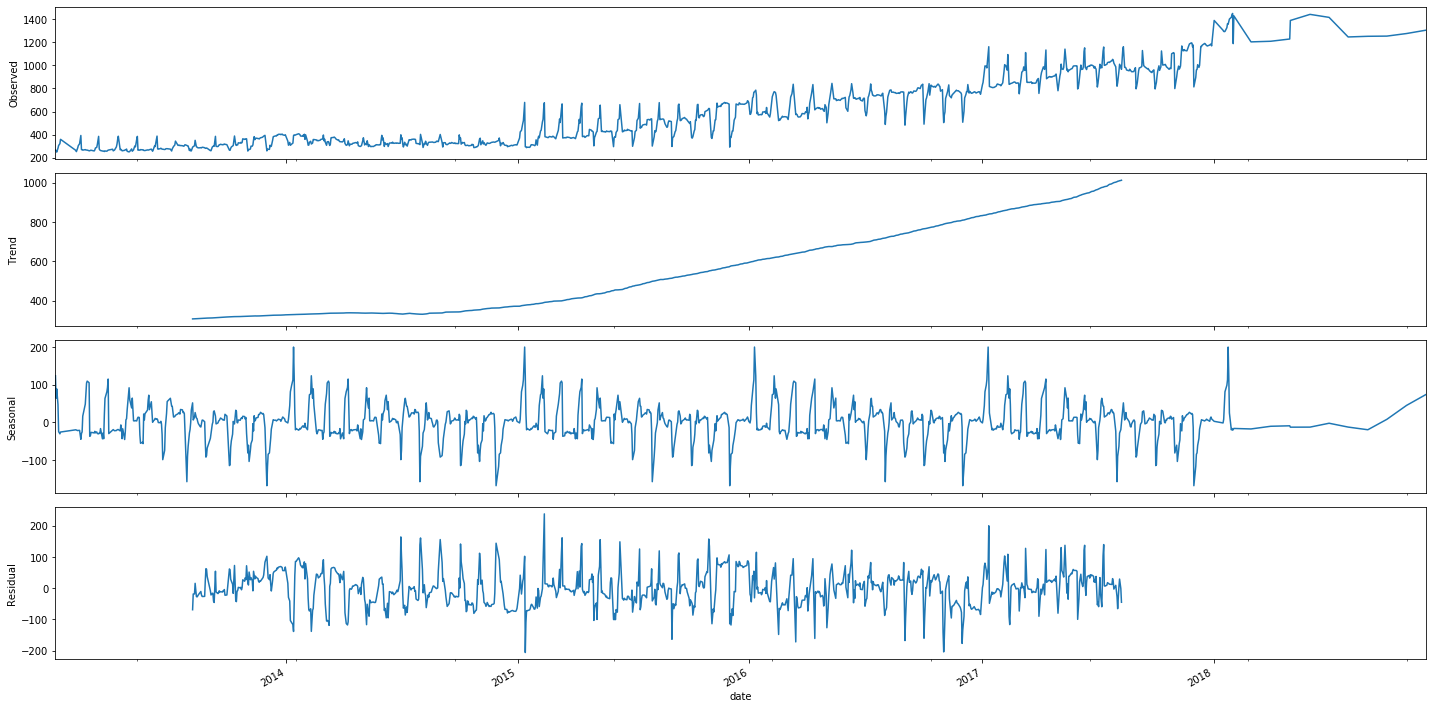

In [375]:
import statsmodels.api
import statsmodels as sm

AMZNHistData = pd.DataFrame(HistData['AMZN'])
res = sm.tsa.seasonal.seasonal_decompose(AMZNHistData,model='additive', freq=252)
resplot = res.plot()

#### Observations/Comments:
* We shall think of the time series $y_t$ as comprising three components: a seasonal component, a trend-cycle component (containing both trend and cycle), and a remainder component (containing anything else in the time series). For example, if we assume an additive model, then we can write:$$y_t=S_t+T_t+E_t$$where ytyt is the data at period $t$, $S_t$ is the seasonal component at period $t$, $T_t$ is the trend-cycle component at period $t$ and $E_t$ is the remainder (or irregular or error) component at period $t$. Alternatively, a multiplicative model would be written as$$y_t=S_t×T_t×E_t$$
* In this notebook I am using additive decomposition model to extract seasonal model. In order to calculate seasonal effect, I used frequency decomposition of 252 meaning, trend is repeated every 252 days (5 trading days and 9 holidays results in 252 trading day).
* As it can be seen from the above chart, overall trend of the market was increasing with the downward trend in 2008–2009. The seasonal trend repeating every year indicate valley and peak.


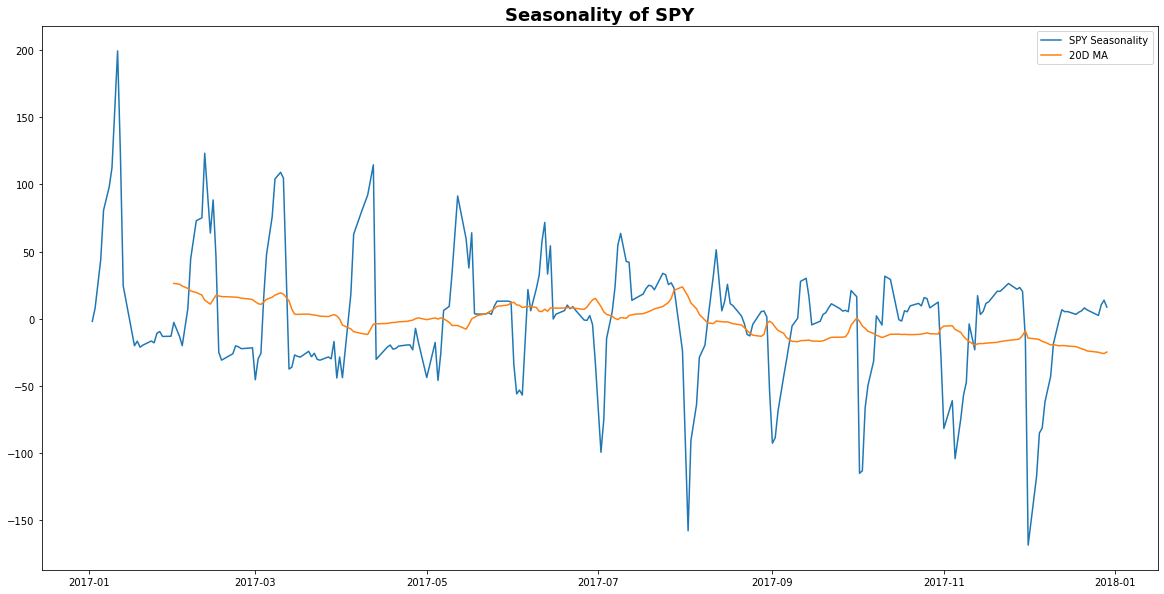

In [376]:
SPY_Seasonality=res.seasonal[res.seasonal.index.year == 2017]
MA1=SPY_Seasonality.rolling(window=20).mean()
plt.plot(SPY_Seasonality, label='SPY Seasonality')
plt.plot(MA1, label='20D MA')
plt.title("Seasonality of SPY", fontsize=18, fontweight='bold')
plt.legend()
plt.show()


#### Observations/Comments:
* The seasonal trend repeating every year indicate valley and peak. Now, we attempt to isolate this trend and inspect it further:
* As it can be seen from the above seasonality chart, the seasonality trend is like a wave with major high happening around May and major lows happening around October.
* Market expands from beginning of the year to Spring, then it follows by a period of contraction to mid fall.
* The seasonality trend reveals change in expectation of market performance during the year.

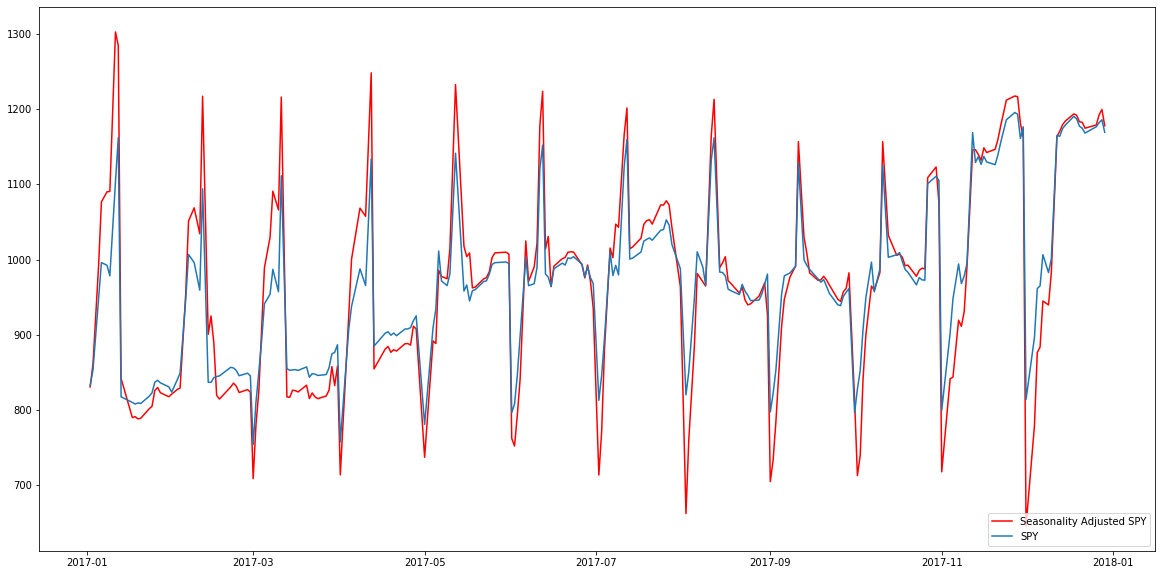

In [377]:

plt.plot(AMZNHistData[AMZNHistData.index.year == 2017]+SPY_Seasonality,color='red',label='Seasonality Adjusted SPY');
plt.plot(AMZNHistData[AMZNHistData.index.year == 2017],label='SPY')
plt.legend(loc=4)
plt.show()

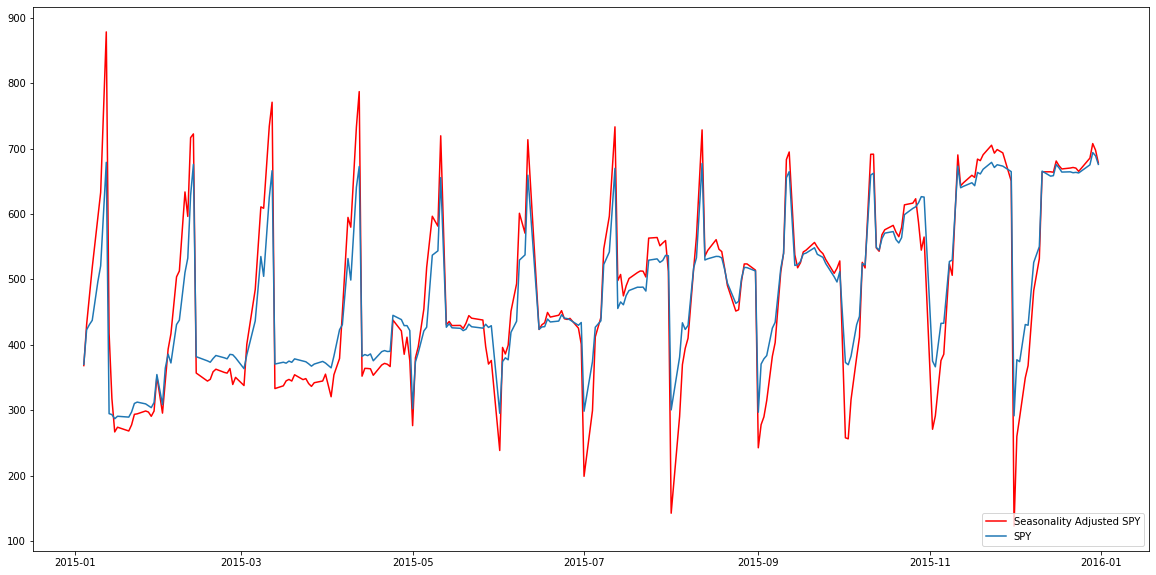

In [378]:
plt.plot(AMZNHistData[AMZNHistData.index.year == 2015]+res.seasonal[res.seasonal.index.year == 2015],color='red',label='Seasonality Adjusted SPY');
plt.plot(AMZNHistData[AMZNHistData.index.year == 2015],label='SPY')
plt.legend(loc=4)
plt.show()

#### Observations/Comments:
* Now we isolated seasonality trend we can, adjust market trend in regard to seasonality. Since we used additive model to identify seasonality, we can simply deduct seasonality from stock data (SPY) and adjust for seasonality. In periods where market has strong bull or bear (upward or downward) trends, seasonality effects might be too weak to observe. However, if market exhibits range bound behavior it, such effect can be more evident. Here, we will look at 2017 data (strong bull market) and 2015 data (sideways behavior)


In [395]:
import datetime
Min_Month=SPY_Seasonality.idxmin().dt.month
Max_Month=SPY_Seasonality.idxmax().dt.month

Index=AMZNHistData.index
Years = list(set(Index.year))
Years.sort()

Returns = d = {'Market Return' : pd.Series(index=Years),'Strategy Return' : pd.Series( index=Years)}
Returns = pd.DataFrame(Returns)

for index, row in Returns.iterrows():
    Data=AMZNHistData[AMZNHistData.index.year == index]
    row['Market Return']=((Data.iloc[-1]-Data.iloc[0])*100/Data.iloc[0])
    if index<Years[-1]:
        # purchase at first day of the min month (this year)
        Purchase=AMZNHistData.loc[(AMZNHistData.index.year==index) & (AMZNHistData.index.month==Min_Month)][0]
        # sell at the first day of max month (next year)
        Sell=AMZNHistData.loc[(AMZNHistData.index.year==index+1) & (AMZNHistData.index.month==Max_Month)][0]
        row['Strategy Return']=(Sell-Purchase)*100/Purchase

ax = Returns[['Market Return','Strategy Return']].plot(kind='bar', title ="Seasonality Strategy vs Market Return", figsize=(15, 10), legend=True, fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("% Returns", fontsize=12)
plt.show()

ValueError: Lengths must match to compare

In [367]:
AMZNHistData = pd.DataFrame(HistData['AMZN'])
AMZNHistData.index.year

Int64Index([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=1259)

In [388]:
import datetime
Min_Month=SPY_Seasonality.idxmin().dt.month
Max_Month=SPY_Seasonality.idxmax().dt.month

Index=HistData.index
Years = list(set(Index.year))
Years.sort()

Returns = d = {'Market Return' : pd.Series(index=Years),'Strategy Return' : pd.Series( index=Years)}
Returns = pd.DataFrame(Returns)

for index, row in Returns.iterrows():
    print(row)
    
Min_Month[0]

Market Return     NaN
Strategy Return   NaN
Name: 2013, dtype: float64
Market Return     NaN
Strategy Return   NaN
Name: 2014, dtype: float64
Market Return     NaN
Strategy Return   NaN
Name: 2015, dtype: float64
Market Return     NaN
Strategy Return   NaN
Name: 2016, dtype: float64
Market Return     NaN
Strategy Return   NaN
Name: 2017, dtype: float64
Market Return     NaN
Strategy Return   NaN
Name: 2018, dtype: float64


12

#### Observations/Comments:
* Now we can simply test the return of a simple strategy based on seasonality. We are going to buy SPY in October and sell the entire holdings in May or simply comparing return of SPY from October of each year to May of next year.

In [381]:
Min_Month=SPY_Seasonality.idxmin().dt.month
Max_Month=SPY_Seasonality.idxmax().dt.month
Min_Month[0]

12

In [371]:
AMZNHistData.index.month.unique()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='date')

In [355]:
# Create Daily Sector Return
DailySectorReturn = pd.DataFrame(index=DailyReturn.index)
for name in SectorName:
    DailySectorReturn[name] = pd.DataFrame(DailyReturn[SectorDict[name]]).mean(axis=1, skipna=True)

DailySectorReturn = DailySectorReturn.dropna()
DailySectorReturn


,Industrials,Technology,Consumer Cyclical,Healthcare,Consumer Defensive,Financial Services,Utilities,Real Estate,Basic Materials,Communication Services,Energy
date,,,,,,,,,,,
2013-01-04,0.033744,0.008292,0.033323,0.039599,0.056686,0.039535,0.045730,0.019200,0.008074,0.044154,0.033303
2013-01-05,-0.008657,0.009729,0.037043,0.019053,0.021393,0.015371,0.053582,0.050719,-0.016168,0.036676,-0.036366
2013-01-07,0.036446,0.047263,0.040603,0.046355,-0.009367,0.079105,-0.087120,-0.072526,0.006798,0.011415,0.025304
2013-01-08,0.076237,0.092820,0.066263,0.070388,0.049609,0.071231,0.063541,0.007121,0.037963,0.043637,0.083318
2013-01-10,0.019508,0.031001,0.025695,0.030962,-0.038334,-0.019818,-0.051925,-0.025188,0.033484,0.021429,0.023468
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01,0.031114,0.031894,0.014363,0.016728,0.041621,0.010527,0.088599,0.095020,0.066996,0.008222,0.120393
2018-09-01,0.002963,-0.005843,-0.002721,0.009639,-0.000373,0.006897,-0.010507,-0.014817,-0.003547,-0.008451,-0.002230
2018-10-01,-0.001155,-0.003145,-0.001929,-0.003380,-0.007584,0.006111,-0.011802,-0.013647,-0.004353,0.000556,-0.002760


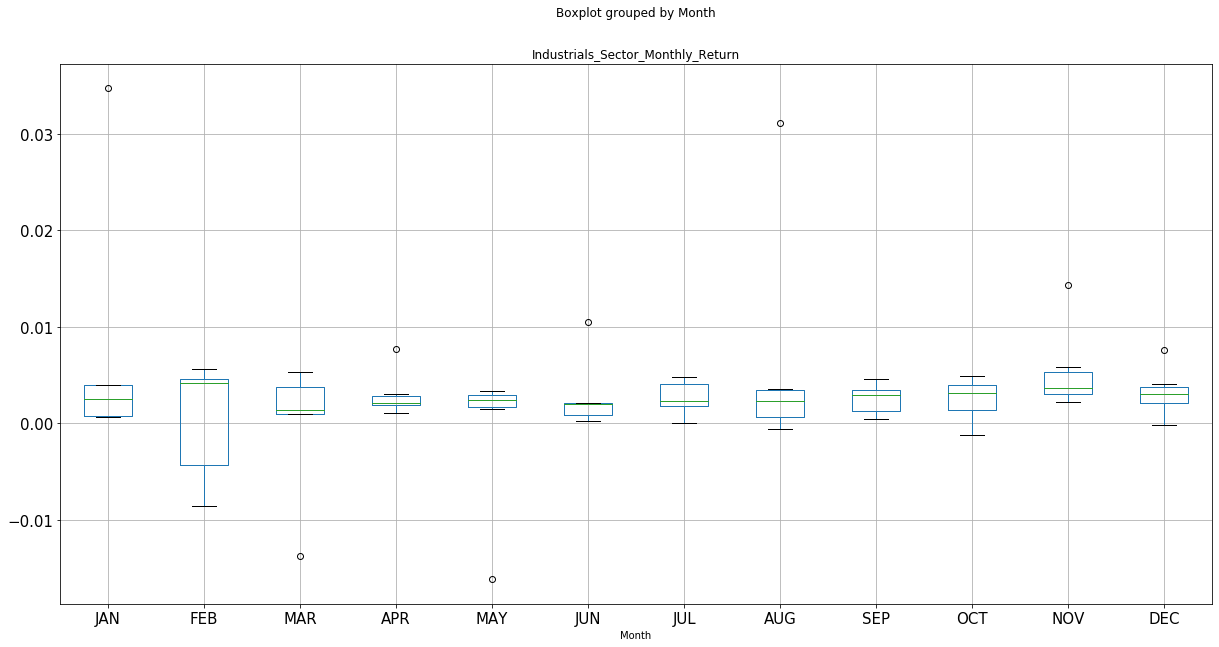

In [272]:
# Boxplot Grouped by Month for Industrials Sector
Monthly_Returns = DailySectorReturn['Industrials'].groupby([DailySectorReturn.index.year.rename('year'), 
                                               DailySectorReturn.index.month.rename('month')]).mean()
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 20,10

Monthly_Returns_List = []
for i in range(len(Monthly_Returns)):
    Monthly_Returns_List.append({'Year':Monthly_Returns.index[i][0],'Month':Monthly_Returns.index[i][1],
                                 'Industrials_Sector_Monthly_Return': Monthly_Returns[i]})
Monthly_Returns_List=pd.DataFrame(Monthly_Returns_List,
                                  columns=('Year','Month','Industrials_Sector_Monthly_Return'))

Monthly_Returns_List.boxplot(column='Industrials_Sector_Monthly_Return', by='Month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

ax.set_xticklabels(labels)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()


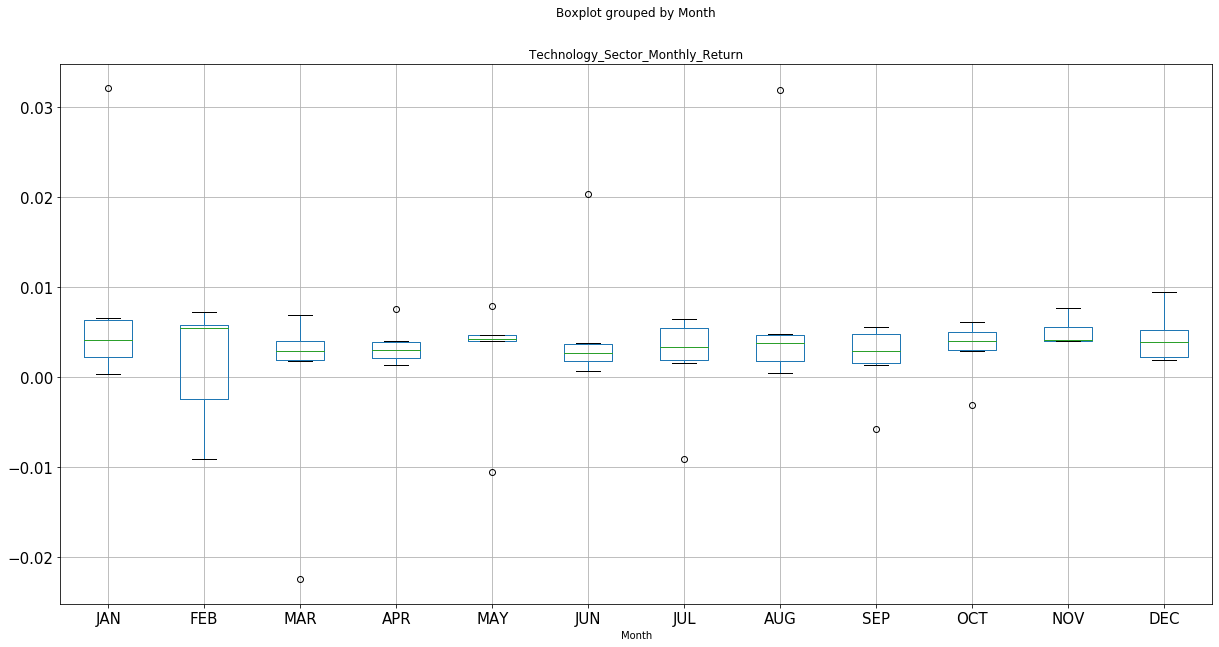

In [273]:
# Boxplot Grouped by Month for Technology Sector
Monthly_Returns = DailySectorReturn['Technology'].groupby([DailySectorReturn.index.year.rename('year'), 
                                               DailySectorReturn.index.month.rename('month')]).mean()
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 20,10

Monthly_Returns_List = []
for i in range(len(Monthly_Returns)):
    Monthly_Returns_List.append({'Year':Monthly_Returns.index[i][0],'Month':Monthly_Returns.index[i][1],
                                 'Technology_Sector_Monthly_Return': Monthly_Returns[i]})
Monthly_Returns_List=pd.DataFrame(Monthly_Returns_List,
                                  columns=('Year','Month','Technology_Sector_Monthly_Return'))

Monthly_Returns_List.boxplot(column='Technology_Sector_Monthly_Return', by='Month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

ax.set_xticklabels(labels)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()


In [255]:
# Create Monthly Sector Return
MonthlySectorReturn = pd.DataFrame(index=MonthlyReturn.index)
for name in SectorName:
    MonthlySectorReturn[name] = pd.DataFrame(MonthlyReturn[SectorDict[name]]).mean(axis=1, skipna=True)

MonthlySectorReturn = MonthlySectorReturn.dropna()
MonthlySectorReturn


,Industrials,Technology,Consumer Cyclical,Healthcare,Consumer Defensive,Financial Services,Utilities,Real Estate,Basic Materials,Communication Services,Energy
date,,,,,,,,,,,
2013-02-28,-0.166235,-0.142961,-0.175785,-0.180167,-0.114727,-0.185190,-0.046657,0.011394,-0.066442,-0.171360,-0.122152
2013-03-29,0.045802,0.023847,0.042561,0.044466,0.063898,0.050991,0.051736,0.020096,0.020945,0.049793,0.034769
2013-04-30,-0.007481,0.005541,0.034510,0.024522,0.024005,0.016707,0.059982,0.059883,-0.011300,0.040435,-0.021222
2013-05-31,0.038882,0.046843,0.025836,0.038035,-0.025830,0.057127,-0.089037,-0.057295,0.038121,-0.015190,0.029180
2013-06-28,-0.028045,-0.013947,-0.012080,-0.005676,0.005148,0.000977,0.007319,-0.018759,-0.056201,0.024404,-0.029340
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,0.031114,0.031894,0.014363,0.016728,0.041621,0.010527,0.088599,0.095020,0.066996,0.008222,0.120393
2018-09-28,0.002963,-0.005843,-0.002721,0.009639,-0.000373,0.006897,-0.010507,-0.014817,-0.003547,-0.008451,-0.002230
2018-10-31,-0.001155,-0.003145,-0.001929,-0.003380,-0.007584,0.006111,-0.011802,-0.013647,-0.004353,0.000556,-0.002760


In [258]:
# Boxplot Grouped by Month
Monthly_Returns = MonthlySectorReturn.groupby([MonthlySectorReturn.index.year.rename('year'), 
                                               MonthlySectorReturn.index.month.rename('month')]).mean()
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 20,10

Monthly_Returns_List = []
for i in range(len(Monthly_Returns)):
    Monthly_Returns_List.append({'Year':Monthly_Returns.index[i][0],'Month':Monthly_Returns.index[i][1],
                                 'Monthly_Return': Monthly_Returns[i]})
Monthly_Returns_List=pd.DataFrame(Monthly_Returns_List,
                                  columns=('Year','Month','Monthly_Return'))

Monthly_Returns_List.boxplot(column='Monthly_Return', by='Month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

ax.set_xticklabels(labels)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()



KeyError: 0

---
# Part 4 - Coronavirus Effect on S&P 500 Stock Prices

#### Task 7:

Sixth question: Can we measure or see the coronavirus effect on S&P 500 stock prices?

Find the coronavirus start date from the "https://github.com/CSSEGISandData/COVID-19" source, prepare trend analysis or graphs and compare it with previous periods. (Jan- Now） ( Compare with previous year) 


### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

---
# Part 5 - Stock Price Forecasting and Prediction

#### Task 8:

Some other predition model analysis?


### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

---
# Part 6 - Conclusion

### To be Filled:

* **Conclusion:**

## References

### To be Filled:

* **References:**